# Function bwlp

## Synopse

Low-Pass Butterworth frequency filter.

- **H = iabwlp(fsize, tc, n, option='circle')**

  - **H**: Image. 
   


  - **fsize**: Image. Filter size: a col vector: first element: rows, second: cols, etc. uses same convention as the return of size.
  - **tc**: Double. Cutoff period.
  - **n**: Double. Filter order.
  - **option**: String. Filter options. Possible values: 'circle' or 'square'.

In [25]:
import numpy as np

def bwlp(fsize, tc, n, option='circle'):
    from dftshift import dftshift

    rows, cols = fsize[0], fsize[1]
    mh, mw = rows//2, cols//2
    rr, cc = np.meshgrid(np.arange(-mh,rows-mh), np.arange(-mw,cols-mw), indexing='ij') # center
    if option.upper() == 'SQUARE':
        H = 1./(1.+(np.sqrt(2)-1)*(np.maximum(abs(1.*rr/rows) , np.abs(1.*cc/cols))*tc)**(2*n))
    else:
        aux = np.sqrt(((((1.*rr)/rows)**2 + ((1.*cc)/cols)**2) * tc) **(2*n))
        H = 1./(1+(np.sqrt(2)-1)*aux)
    H = dftshift(H)
    return H

## Description

This function generates a frequency domain Low Pass Butterworth Filter with cutoff period ``tc`` and order ``n``. 
At the cutoff period the filter amplitude is about 0.7 of the amplitude at H(0,0). This function returns the mask filter with H(0,0). 
As the larger the filter order, sharper will be the amplitude transition at cutoff period. The minimum cutoff period is always 2 pixels, 
despite of the size of the frequency filter.

## Examples

In [1]:
testing = (__name__ == "__main__")
if testing:
    ! jupyter nbconvert --to python bwlp.ipynb
    import numpy as np
    import sys,os
    ia898path = os.path.abspath('../../')
    if ia898path not in sys.path:
        sys.path.append(ia898path)
    import ia898.src as ia

[NbConvertApp] Converting notebook bwlp.ipynb to python
[NbConvertApp] Writing 3622 bytes to bwlp.py


### Example 1

""
""

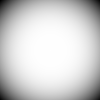

In [2]:
if testing:

    H2_10 = ia.bwlp([100,100],2,2) # cutoff period: 2 pixels, order: 10
    ia.adshow(ia.dftview(H2_10))

""
""

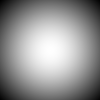

In [3]:
if testing:
    H4_1 = ia.bwlp([100,100],4,1) # cutoff period: 4, order: 1
    ia.adshow(ia.dftview(H4_1))

""
""

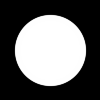

In [4]:
if testing:
    H8_100 = ia.bwlp([100,100],8,100) # cutoff period: 8, order: 100
    ia.adshow(ia.dftview(H8_100))

""
""

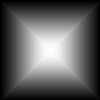

In [5]:
if testing:
    H4_1box = ia.bwlp([100,100],4,1,'square') # cutoff period: 4, order: 1
    ia.adshow(ia.dftview(H4_1box))

### Example 2

    f = adreadgray('cookies.pgm')
    adshow(f)
    F = fft.fft2(f)
    adshow(iadftview(F))
    H = iabwlp(F.shape,16,6)
    adshow(iadftview(H))
    G = F * H
    adshow(iadftview(G))
    g = fft.ifft2(G)
    g = abs(g).astype(uint8)
    adshow(g)

## Equation

$$ \begin{matrix}    H(u,v) & = & \frac{1}{1+ (\sqrt{2}-1) (\sqrt{(\frac{u}{N})^2 + (\frac{v}{M})^2} \ \ t_c)^{2n}} \\ (u,v) & \in & \{ -\lfloor \frac{N}{2}\rfloor:N-\lfloor \frac{N}{2}\rfloor - 1 , -\lfloor \frac{M}{2} \rfloor:M-\lfloor \frac{M}{2}\rfloor-1 \} \\ t_c & \in & \{ 2 : \max\{N,M\} \}
\end{matrix} $$

    
    print 'testing iabwlp'
    print `floor(0.5 + 1E4*iabwlp([5,8],2,3)) / 1E4` == `array(
          [[ 0.9983,  0.9955,  0.9722,  0.8649,  0.6073,  0.8649,  0.9722,  0.9955],
           [ 0.9021,  0.8744,  0.774 ,  0.5813,  0.3537,  0.5813,  0.774 ,  0.8744],
           [ 0.9021,  0.8744,  0.774 ,  0.5813,  0.3537,  0.5813,  0.774 ,  0.8744],
           [ 0.9983,  0.9955,  0.9722,  0.8649,  0.6073,  0.8649,  0.9722,  0.9955],
           [ 1.    ,  0.9999,  0.9936,  0.9313,  0.7071,  0.9313,  0.9936,  0.9999]])`